# **Exploratory Data Analysis**

##### **Install and Import Libraries**

In [16]:
!apt install python3-rtree --quiet
!pip install geopandas
!pip install contextily
!pip install mapclassify

Reading package lists...
Building dependency tree...
Reading state information...
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import contextily as ctx

##### **Read data**

In [18]:
cleaned_df = pd.read_csv('content/houses_cleaned.csv')
cleaned_df.head(5)

SALE TYPE              PROPERTY TYPE  ...   LATITUDE   LONGITUDE
0  MLS Listing                  Townhouse  ...  45.568689 -122.845517
1  MLS Listing  Single Family Residential  ...  45.458188 -122.559190
2    PAST SALE  Single Family Residential  ...  45.537885 -122.795329
3    PAST SALE  Single Family Residential  ...  45.552848 -122.850795
4    PAST SALE  Single Family Residential  ...  45.527355 -122.773088

[5 rows x 22 columns]

In [19]:
cleaned_df.shape

(714, 22)

##### **Dataframe to Geodataframe**

Lets convert the dataframe to spatial dataframe to apply spatial operations it

In [20]:
cleaned_gdf = gpd.GeoDataFrame(cleaned_df,crs='epsg:4326', geometry=gpd.points_from_xy(x=cleaned_df.LONGITUDE, y=cleaned_df.LATITUDE)) 
print(type(cleaned_gdf))
cleaned_gdf.head(5)

<class 'geopandas.geodataframe.GeoDataFrame'>


SALE TYPE  ...                     geometry
0  MLS Listing  ...  POINT (-122.84552 45.56869)
1  MLS Listing  ...  POINT (-122.55919 45.45819)
2    PAST SALE  ...  POINT (-122.79533 45.53788)
3    PAST SALE  ...  POINT (-122.85079 45.55285)
4    PAST SALE  ...  POINT (-122.77309 45.52736)

[5 rows x 23 columns]

##### **Heatmap**

Lets plot heatmap to see clustering of points and visualize it using folium web map

In [21]:
xmin, ymin, xmax, ymax = cleaned_gdf.total_bounds
m = folium.Map([45.5686886, -122.8455172],  zoom_start=10,min_lat=ymin, max_lat=ymax, min_lon=xmin, max_lon=xmax,max_bounds= True)
coords_list = [[point.y, point.x] for point in cleaned_gdf.geometry ]
HeatMap(coords_list).add_to(m)
m

##### **Chloropeth Maps**

To give a better idea regarding the locations of the points for properties and their attribute values we can plot it using chloropeth maps. Lets plot chloropeth maps for Beds, Price, HOA PER MONTH. HOA stands for homeowners association, they charge monthly a fee which needs to be paid by tenant or owner. 

First we would reprojecte the data to epsg 3857 to add basemap layer behind the chloropeth maps

In [22]:
cleaned_gdf = cleaned_gdf.to_crs(epsg=3857)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  This is separate from the ipykernel package so we can avoid doing imports until


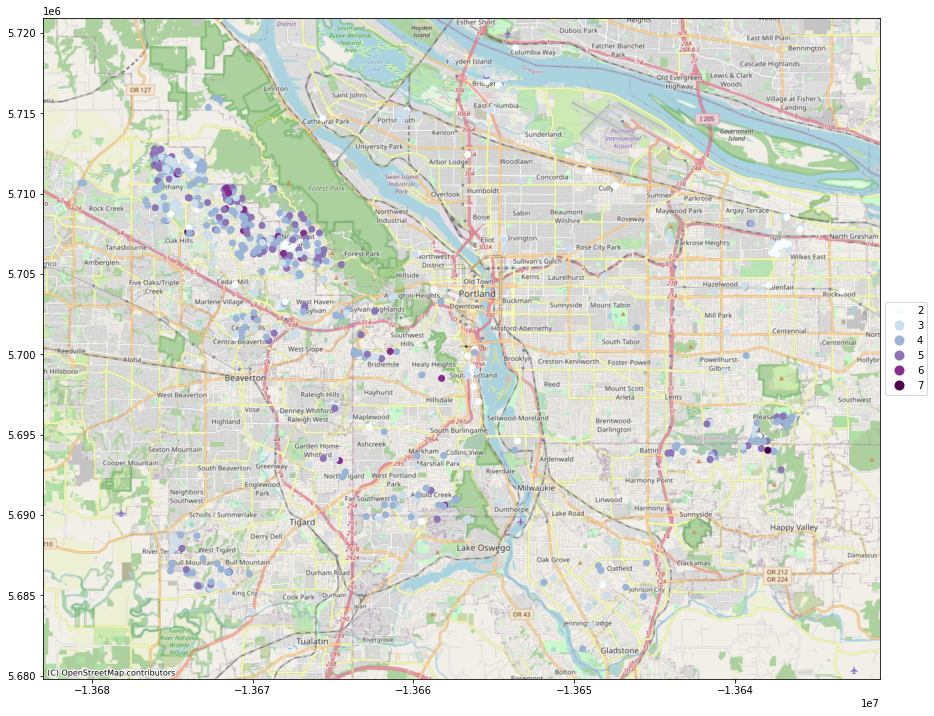

In [23]:
ax = cleaned_gdf.plot(column='BEDS', categorical=True, k=4, figsize=(15, 15), \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)},)
ctx.add_basemap(ax,url = ctx.providers.OpenStreetMap.Mapnik)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  This is separate from the ipykernel package so we can avoid doing imports until


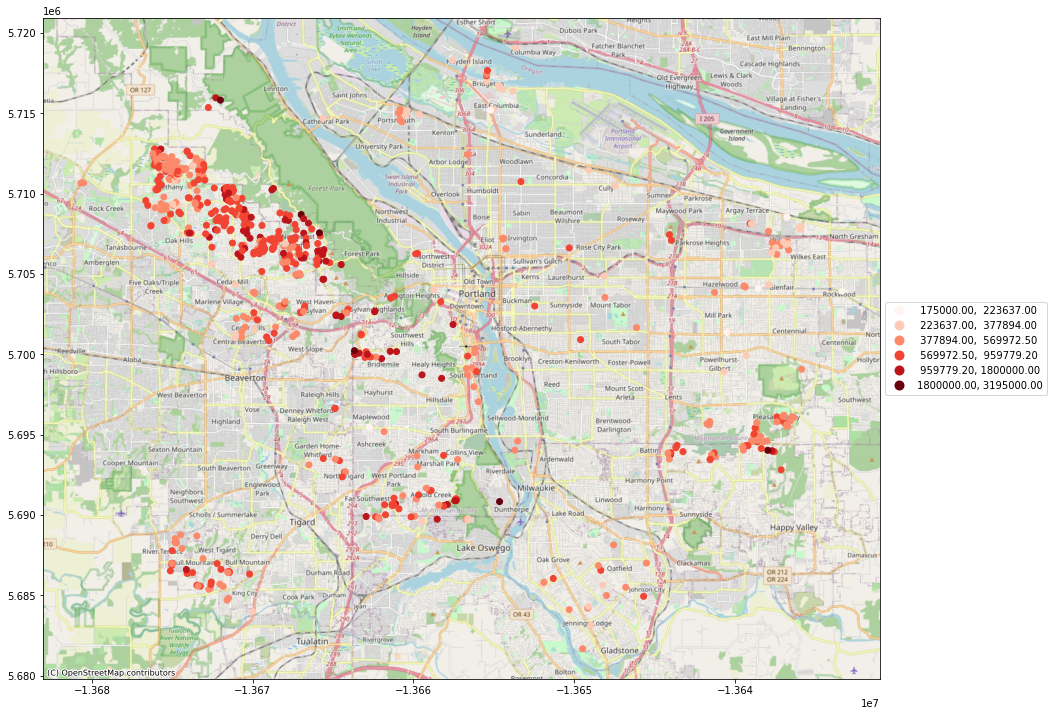

In [24]:
ax = cleaned_gdf.plot(column='PRICE',scheme='percentiles', k=4, figsize=(15, 15), \
             cmap='Reds', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ctx.add_basemap(ax,url = ctx.providers.OpenStreetMap.Mapnik)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  This is separate from the ipykernel package so we can avoid doing imports until


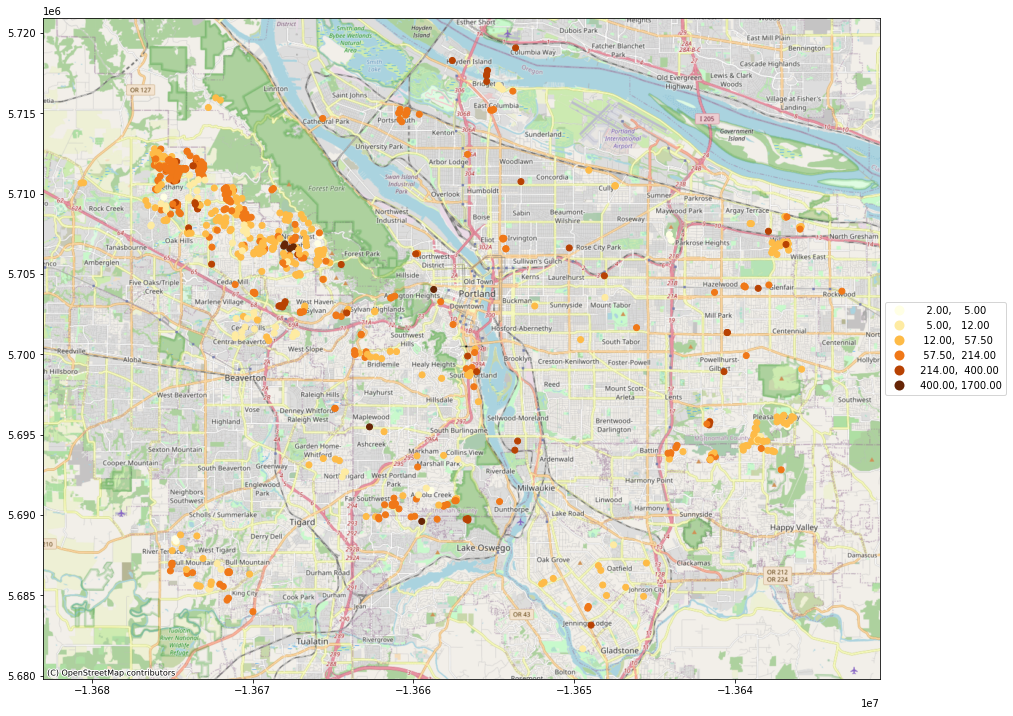

In [25]:
ax = cleaned_gdf.plot(column='HOA PER MONTH',scheme='percentiles', k=4, figsize=(15, 15), \
             cmap='YlOrBr', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ctx.add_basemap(ax,url = ctx.providers.OpenStreetMap.Mapnik)

Based on the maps we can see that the area near the Forest Park has high prices, highest HOA per month. Hence we can conclude that the area consist of luxurious apartment.

##### **Plot categorical data**

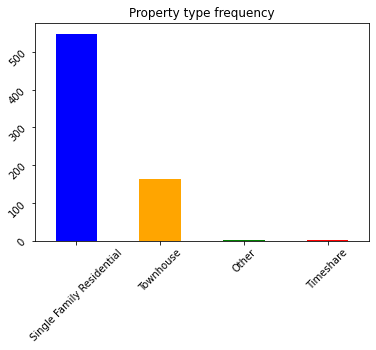

In [26]:
plt = cleaned_gdf['PROPERTY TYPE'].value_counts().plot(kind='bar', title='Property type frequency',color=['blue', 'orange', 'green', 'red'])
plt.tick_params(labelrotation=45)

##### **Sample data of property built after 2000**

We will take the properties which were built after year 2000 by querying the dataframe

In [27]:
filtered_df = cleaned_gdf[(cleaned_gdf['YEAR BUILT']>=2000)]
filtered_df.shape

(459, 23)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  


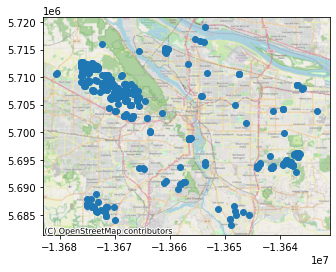

In [28]:
ax = filtered_df.plot()
ctx.add_basemap(ax,url = ctx.providers.OpenStreetMap.Mapnik)

##### **Saving to Disk**

In [29]:
filtered_df.to_csv('sample_houses.csv',index=False)